In [1]:
!pip install nibabel
!pip install seaborn
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Input
from keras.layers import Convolution3D,Conv3D,Add,concatenate, MaxPool3D,add, Convolution2D,BatchNormalization, GlobalAveragePooling3D, ZeroPadding3D
from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, MaxPool3D, Flatten, Dense, Dropout, concatenate, Lambda, Layer
from keras import backend as K
import cv2
import operator
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
import nibabel as nib
import pandas as pd
from scipy.ndimage import rotate
import random
import nibabel as nib
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import nibabel as nib
from matplotlib import animation, rc
from scipy.ndimage import rotate
import glob
import os
from sklearn.model_selection import KFold, StratifiedKFold,train_test_split
from scipy.ndimage import zoom
from matplotlib.patches import PathPatch, Rectangle
from IPython.display import HTML
from tensorflow.keras import layers

from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, MaxPool3D, Flatten, Dense, Dropout, concatenate, Lambda, Layer
from tensorflow.keras.models import Model
import tensorflow as tf

E0000 00:00:1723305961.845132      13 common_lib.cc:815] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`=local.
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:531


In [3]:
# Enable TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Device:", tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Device: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2024-08-10 16:06:16.446216: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:06:16.446321: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:06:16.446421: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:06:16.446510: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:06:16.446585: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:06:16.446802: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:06:16.446893: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Number of accelerators:  8


### FUNCTIONS

In [4]:
def define_model():
    model = Sequential()
    model.add(Conv3D(32,(3,3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32,32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv3D(32, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    #model.add(Dropout(0.1))
    
    model.add(Conv3D(64, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(64, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    #model.add(Dropout(0.2))
    
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))

    model.add(Conv3D(256, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(256, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    #model.add(MaxPool3D((2, 2,2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))


    model.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'));
    return model

In [5]:
BS=68 # batch size
RS= 0 #random state
E = 200 #epoch

In [6]:
def aug_rotate(x):

    rotated_slices = []
    for slice_idx in range(x.shape[2]):
        slice_data = x[:, :, slice_idx]  # Extract a single slice
        rotated_slice = rotate(slice_data, angle=angles[j], reshape=False, mode='nearest')
        rotated_slices.append(rotated_slice)

    # Create a new NIfTI image from the rotated slices
    rotated_img_data = np.stack(rotated_slices, axis=-1)
    # Create a new NIfTI image using the header information from the original image
    rotated_nifti = nib.Nifti1Image(rotated_img_data, img.affine)
    
    return rotated_nifti

### DATA LOAD

In [7]:
luna_df = pd.read_excel('/kaggle/input/spie-cropped-resampled-dataset/final_Luna16.xlsx')
column_luna = 'malignancy'
luna_series=luna_df['Series Uid'].tolist()

luna_folder = '/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled'  
luna = []
for i in luna_series:
    nii_file_path = os.path.join(luna_folder, f'{i}.nii')  # Assuming NII files have the extension '.nii'
    
    if os.path.exists(nii_file_path):
        luna.append(i)
luna=np.array(luna)

print(luna.shape)

(557,)


### DATA PREPARATION FOR SSL(UNLABELED)

In [8]:
luna_semi_df = pd.read_excel('/kaggle/input/spie-cropped-resampled-dataset/unlabeled_data_Luna.xlsx')
#column_name = 'malignancy'
col_scan='Series Uid'

luna_semi_scan = luna_semi_df[col_scan].tolist()

scans1=[]
for i in luna_semi_scan:
    scans1.append(i)

luna_semi=np.array(scans1)
print(len(luna_semi))

612


In [9]:
datas_luna_semi=[]
scans_luna_semi=[]

for i in luna_semi:
    img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/",i +"*.nii"))

    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        datas_luna_semi.append(data)
        scans_luna_semi.append(i)

X_luna_semi = np.array(datas_luna_semi)
z_luna_semi= np.array(scans_luna_semi)

print(X_luna_semi.shape)

(611, 32, 32, 32)


### FIXED TEST SET

In [10]:
luna_initial,luna_fixed_test = train_test_split(luna, test_size=0.2, random_state=RS)

z_luna_fixed_test=np.array(luna_fixed_test)
z_luna_initial=np.array(luna_initial)

print(luna_initial.shape)# initial train
print(luna_fixed_test.shape)

(445,)
(112,)


In [11]:
luna_fixed_test_df = pd.DataFrame({'luna fixed test set': luna_fixed_test})
luna_initial_df = pd.DataFrame({'luna initial set': luna_initial})


# Create a new DataFrame with the matched scans
matched_df = pd.DataFrame({'luna fixed test set': luna_fixed_test_df['luna fixed test set'],
                           'luna initial set': luna_initial_df['luna initial set'],})



matched_df.to_excel('/kaggle/working/scans_for_semisupervised.xlsx', index=False)

In [12]:
datas_luna_fixed_test=[]
labels_luna_fixed_test=[]
scans_luna_fixed_test=[]

for i in luna_fixed_test:
    lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/",i +"*.nii"))

    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        datas_luna_fixed_test.append(data)
        labels_luna_fixed_test.append(lab)
        scans_luna_fixed_test.append(i)

X_luna_fixed_test = np.array(datas_luna_fixed_test)
y_luna_fixed_test = np.array(labels_luna_fixed_test)
z_luna_fixed_test= np.array(scans_luna_fixed_test)

print(X_luna_fixed_test.shape)

(112, 32, 32, 32)


###  FIRST TRAIN

In [13]:
z_train1, z_val1 = train_test_split(z_luna_initial, test_size=0.2, random_state=RS)
print(z_train1.shape,z_val1.shape)

(356,) (89,)


In [14]:
angles = [0, 45, 90, 135, 180, 225, 270, 315]


datas_train = []
labels_train=[]

datas_val = []
labels_val=[]

for i in z_train1:
    lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/",i +"*.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        
        for j in range(len(angles)):
            rotated_nifti = aug_rotate(data)
            datas_train.append(rotated_nifti.get_fdata())
            labels_train.append(lab)
            
            
for i in z_val1:
    lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/",i +"*.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        datas_val.append(data)
        labels_val.append(lab)


X_train1=np.array(datas_train)
y_train1=np.array(labels_train)

X_val1=np.array(datas_val)
y_val1=np.array(labels_val)        

print(y_train1.shape,sum(y_train1))
print(y_val1.shape,sum(y_val1))

(2848,) 1312
(89,) 49


In [15]:
with strategy.scope():
    model=define_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('semiSupervised_HU1.h5', monitor='val_accuracy',save_best_only=True)

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
# Fit data to model
history = model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[lr_callback,checkpoint_callback],verbose=0)


# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model1 = tf.keras.models.load_model('semiSupervised_HU1.h5')

loss1, accuracy1 = best_model1.evaluate(X_luna_fixed_test, y_luna_fixed_test)   


print(f'Luna Accuracy: {accuracy1}')
print('luna loss: ',loss1)


2024-08-10 16:07:04.956281: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:07:04.956416: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:07:10.051444: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:07:10.069320: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:07:10.086440: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:07:10.104251: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-10 16:07:10.121394: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

4/4 [==============================] - 1s 199ms/step - loss: 0.3571 - accuracy: 0.8750
Luna Accuracy: 0.875
luna loss:  0.357098251581192


4/4 [==============================] - 1s 202ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.96      0.79      0.87        57
   malignant       0.82      0.96      0.88        55

    accuracy                           0.88       112
   macro avg       0.89      0.88      0.87       112
weighted avg       0.89      0.88      0.87       112



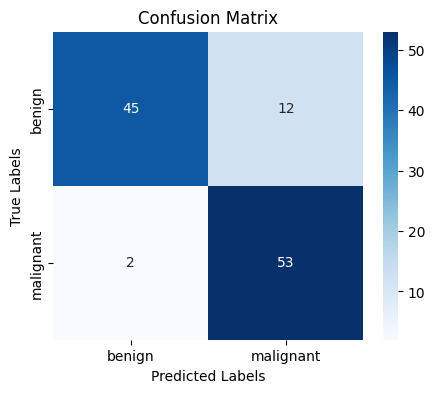

AUC: 0.9473684210526316
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


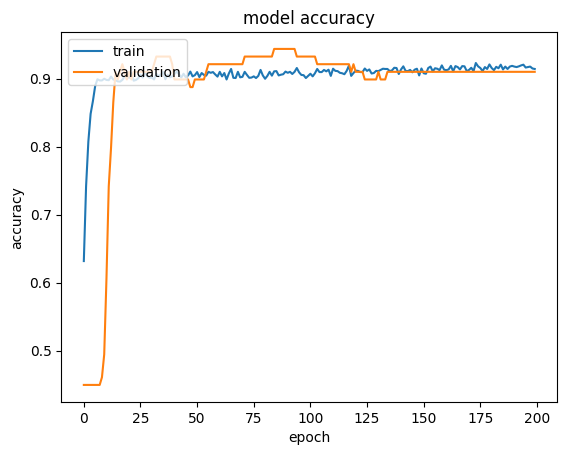

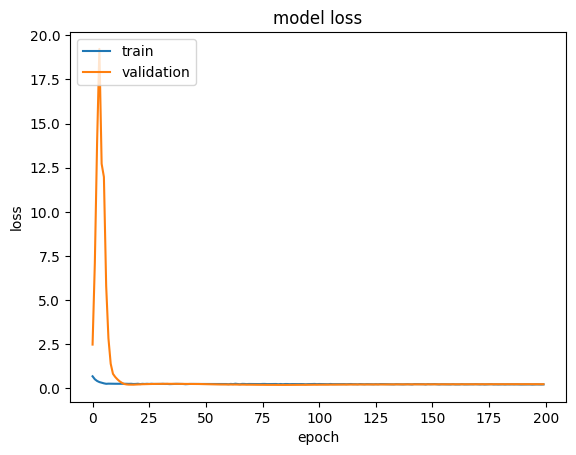

In [16]:
predictions = best_model1.predict(X_luna_fixed_test)
predicted_classes = (predictions > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report1 = classification_report(y_luna_fixed_test, predicted_classes , target_names=class_names)
print("Classification Report:\n", report1)

# Generate the confusion matrix
cm1 = confusion_matrix(y_luna_fixed_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

auc = roc_auc_score(y_luna_fixed_test, predictions)
print(f'AUC: {auc}')

#---------------------------------------------------------
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
import pickle
pickle.dump(X_luna_fixed_test,open('test_x','wb'))
pickle.dump(y_luna_fixed_test,open('test_y','wb'))
pickle.dump(z_luna_fixed_test,open('test_z','wb'))


pickle.dump(X_val1,open('val1_x','wb'))
pickle.dump(y_val1,open('val1_y','wb'))
pickle.dump(z_val1,open('val1_z','wb'))



### prediction from unbalanced data

In [18]:
correct_predictions1 = []
incorrect_predictions1 = []

predictions = best_model1.predict(X_luna_semi)
for i in range(len(X_luna_semi)):
    if predictions[i] > 0.9:
        correct_predictions1.append((z_luna_semi[i], 1))
    elif predictions[i] < 0.1:
        correct_predictions1.append((z_luna_semi[i], 0))
    else:
        incorrect_predictions1.append(z_luna_semi[i])

print(len(incorrect_predictions1),len(correct_predictions1))
        
# Create a DataFrame with 'scan' and 'malignancy' columns
df_correct_predictions1 = pd.DataFrame(correct_predictions1, columns=['scan', 'malignancy'])

scan_identifiers_z_train2 = np.array([item[0] for item in correct_predictions1])


20/20 [==============================] - 4s 219ms/step
202 409


In [19]:
datas_train = []
labels_train=[]
scans_train=[]

datas_val = []
labels_val=[]
scans_val=[]



for i in scan_identifiers_z_train2:
    lab = df_correct_predictions1.loc[df_correct_predictions1['scan'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

    scans_train.append(i)
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()

        for j in range(len(angles)):
            rotated_nifti = aug_rotate(data)
            datas_train.append(rotated_nifti.get_fdata())
            labels_train.append(lab)



X_train2=np.array(datas_train)
y_train2=np.array(labels_train)
z_train2=np.array(scans_train)

print(z_train2.shape)

(409,)


In [20]:
X_train = np.concatenate((X_train1, X_train2))
y_train = np.concatenate((y_train1, y_train2))
z_train = np.concatenate((z_train1, z_train2))
print(z_train.shape)

(765,)


## second train

In [21]:
with strategy.scope():
    model=define_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('semiSupervised_HU2.h5', monitor='val_accuracy',save_best_only=True)

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
# Fit data to model
history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[lr_callback,checkpoint_callback],verbose=0)


# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model2 = tf.keras.models.load_model('semiSupervised_HU2.h5')

loss2, accuracy2 = best_model2.evaluate(X_luna_fixed_test, y_luna_fixed_test)   


print(f'Luna Accuracy: {accuracy2}')
print('luna loss: ',loss2)



2024-08-10 16:14:47.716509: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-10 16:16:07.199727: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 202ms/step - loss: 0.5296 - accuracy: 0.8393
Luna Accuracy: 0.8392857313156128
luna loss:  0.5296273827552795


4/4 [==============================] - 1s 198ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.90      0.77      0.83        57
   malignant       0.79      0.91      0.85        55

    accuracy                           0.84       112
   macro avg       0.85      0.84      0.84       112
weighted avg       0.85      0.84      0.84       112



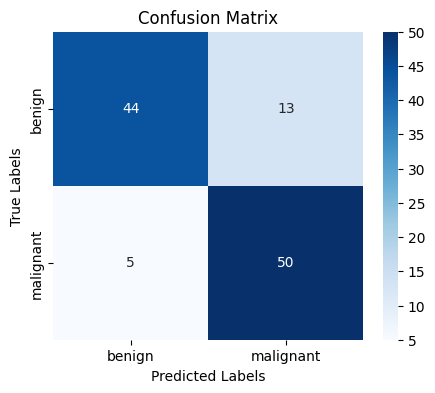

AUC: 0.9304625199362041
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


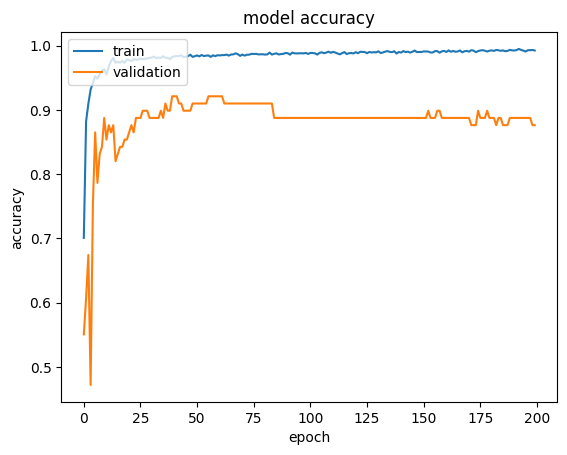

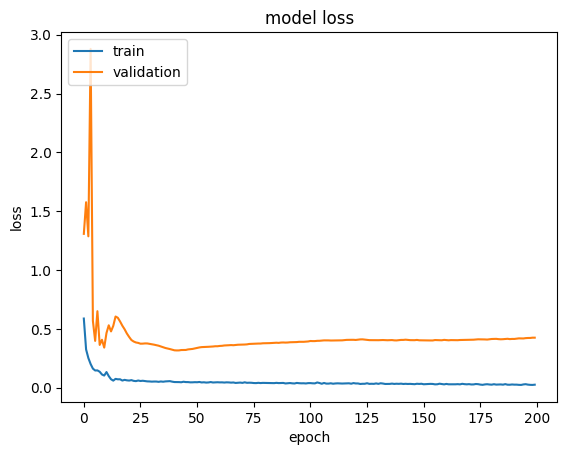

In [22]:
predictions = best_model2.predict(X_luna_fixed_test)
predicted_classes = (predictions > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report2 = classification_report(y_luna_fixed_test, predicted_classes , target_names=class_names)
print("Classification Report:\n", report2)

# Generate the confusion matrix
cm2 = confusion_matrix(y_luna_fixed_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

auc = roc_auc_score(y_luna_fixed_test, predictions)
print(f'AUC: {auc}')
#---------------------------------------------------------
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### unpredicted data after 2nd train

In [23]:
datas_semi = []
labels_semi = []
scans_semi = []

for i in incorrect_predictions1:
        img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

        for img_file in img_files:
            img = nib.load(img_file)
            data = img.get_fdata()
            datas_semi.append(data)
            scans_semi.append(i)

X_semi2 = np.array(datas_semi)
z_semi2 = np.array(scans_semi)

print(X_semi2.shape)


(202, 32, 32, 32)


In [24]:
correct_predictions2 = []
incorrect_predictions2 = []

predictions = best_model2.predict(X_semi2)
for i in range(len(X_semi2)):
    if predictions[i] > 0.9:
        correct_predictions2.append((z_luna_semi[i], 1))
    elif predictions[i] < 0.1:
        correct_predictions2.append((z_luna_semi[i], 0))
    else:
        incorrect_predictions2.append(z_luna_semi[i])

print(len(incorrect_predictions2),len(correct_predictions2))

# Create a DataFrame with 'scan' and 'malignancy' columns
df_correct_predictions2 = pd.DataFrame(correct_predictions2, columns=['scan', 'malignancy'])


scan_identifiers_z_train3 = np.array([item[0] for item in correct_predictions2])

7/7 [==============================] - 2s 216ms/step
79 123


In [25]:
datas_train = []
labels_train=[]
scans_train=[]

datas_val = []
labels_val=[]
scans_val=[]



for i in scan_identifiers_z_train3:
    lab = df_correct_predictions2.loc[df_correct_predictions2['scan'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

    scans_train.append(i)
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()

        for j in range(len(angles)):
            rotated_nifti = aug_rotate(data)
            datas_train.append(rotated_nifti.get_fdata())
            labels_train.append(lab)



X_train3=np.array(datas_train)
y_train3=np.array(labels_train)
z_train3=np.array(scans_train)

print(z_train3.shape)

(123,)


In [26]:
X_train = np.concatenate((X_train1, X_train2 , X_train3))
y_train = np.concatenate((y_train1, y_train2 , y_train3))
z_train = np.concatenate((z_train1, z_train2 , z_train3))
print(z_train.shape)

(888,)


## 3rd train

In [27]:
with strategy.scope():
    model=define_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('semiSupervised_HU3.h5', monitor='val_accuracy',save_best_only=True)

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
# Fit data to model
history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[lr_callback,checkpoint_callback],verbose=0)


# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model3 = tf.keras.models.load_model('semiSupervised_HU3.h5')

loss3, accuracy3 = best_model3.evaluate(X_luna_fixed_test, y_luna_fixed_test)   

print(f'Luna Accuracy: {accuracy3}')
print('luna loss: ',loss3)



2024-08-10 16:24:58.650957: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 211ms/step - loss: 0.3506 - accuracy: 0.8571
Luna Accuracy: 0.8571428656578064
luna loss:  0.3505673110485077


4/4 [==============================] - 1s 207ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.90      0.81      0.85        57
   malignant       0.82      0.91      0.86        55

    accuracy                           0.86       112
   macro avg       0.86      0.86      0.86       112
weighted avg       0.86      0.86      0.86       112



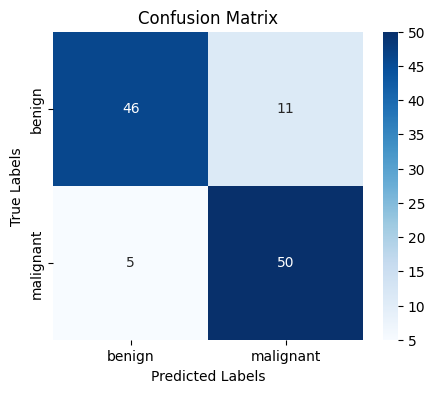

AUC: 0.9295055821371611
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


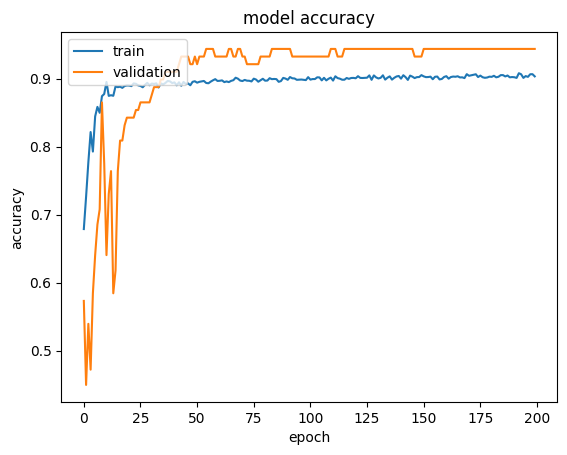

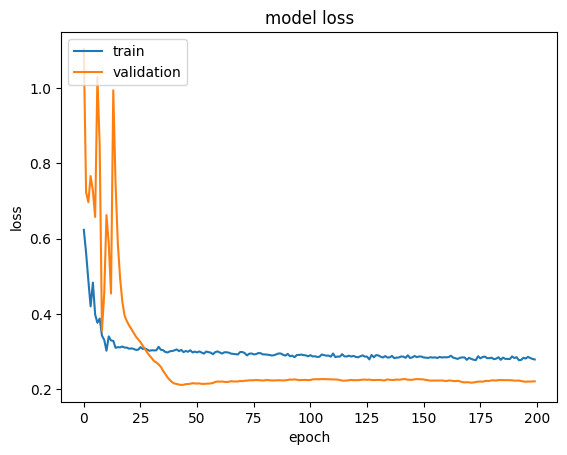

In [28]:
predictions = best_model3.predict(X_luna_fixed_test)
predicted_classes = (predictions > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report3 = classification_report(y_luna_fixed_test, predicted_classes , target_names=class_names)
print("Classification Report:\n", report3)

# Generate the confusion matrix
cm3 = confusion_matrix(y_luna_fixed_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

auc = roc_auc_score(y_luna_fixed_test, predictions)
print(f'AUC: {auc}')
#---------------------------------------------------------
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### unpredicted data after 3rd train

In [29]:
datas_semi = []
labels_semi = []
scans_semi = []

for i in incorrect_predictions2:
        img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

        for img_file in img_files:
            img = nib.load(img_file)
            data = img.get_fdata()
            datas_semi.append(data)
            scans_semi.append(i)

X_semi3 = np.array(datas_semi)
z_semi3 = np.array(scans_semi)

print(X_semi3.shape)

(79, 32, 32, 32)


In [30]:
correct_predictions3 = []
incorrect_predictions3 = []

predictions = best_model3.predict(X_semi3)
for i in range(len(X_semi3)):
    if predictions[i] > 0.9:
        correct_predictions3.append((z_luna_semi[i], 1))
    elif predictions[i] < 0.1:
        correct_predictions3.append((z_luna_semi[i], 0))
    else:
        incorrect_predictions3.append(z_luna_semi[i])

print(len(incorrect_predictions3),len(correct_predictions3))
        
# Create a DataFrame with 'scan' and 'malignancy' columns
df_correct_predictions3 = pd.DataFrame(correct_predictions3, columns=['scan', 'malignancy'])

print(df_correct_predictions3.shape)


scan_identifiers_z_train4 = np.array([item[0] for item in correct_predictions3])

3/3 [==============================] - 1s 182ms/step
30 49
(49, 2)


In [31]:
datas_train = []
labels_train=[]
scans_train=[]

datas_val = []
labels_val=[]
scans_val=[]



for i in scan_identifiers_z_train4:
    lab = df_correct_predictions3.loc[df_correct_predictions3['scan'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

    scans_train.append(i)
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()

        for j in range(len(angles)):
            rotated_nifti = aug_rotate(data)
            datas_train.append(rotated_nifti.get_fdata())
            labels_train.append(lab)



X_train4=np.array(datas_train)
y_train4=np.array(labels_train)
z_train4=np.array(scans_train)

print(z_train4.shape)

(49,)


In [54]:
X_train = np.concatenate((X_train1, X_train2 , X_train3 , X_train4))
y_train = np.concatenate((y_train1, y_train2 , y_train3 , y_train4))
z_train = np.concatenate((z_train1, z_train2 , z_train3 , z_train4))
print(z_train.shape)

(937,)


## 4th train

In [56]:
with strategy.scope():
    model=define_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('semiSupervised_HU4.h5', monitor='val_accuracy',save_best_only=True)

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
# Fit data to model
history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[lr_callback,checkpoint_callback],verbose=0)


# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model4 = tf.keras.models.load_model('semiSupervised_HU4.h5')

loss4, accuracy4 = best_model4.evaluate(X_luna_fixed_test, y_luna_fixed_test)   
print(f'Luna Accuracy: {accuracy4}')
print('luna loss: ',loss4)

2024-08-10 17:32:41.664033: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


4/4 [==============================] - 1s 213ms/step - loss: 0.5965 - accuracy: 0.8571
Luna Accuracy: 0.8571428656578064
luna loss:  0.5965300798416138


4/4 [==============================] - 1s 208ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.92      0.79      0.85        57
   malignant       0.81      0.93      0.86        55

    accuracy                           0.86       112
   macro avg       0.86      0.86      0.86       112
weighted avg       0.86      0.86      0.86       112



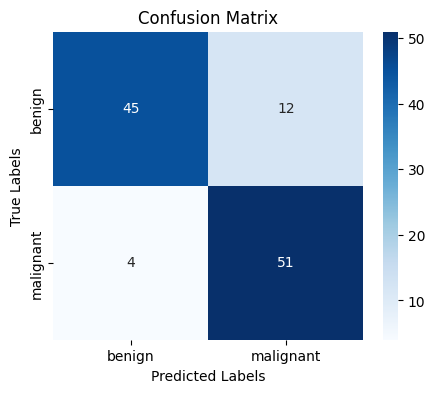

AUC: 0.9113237639553429
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


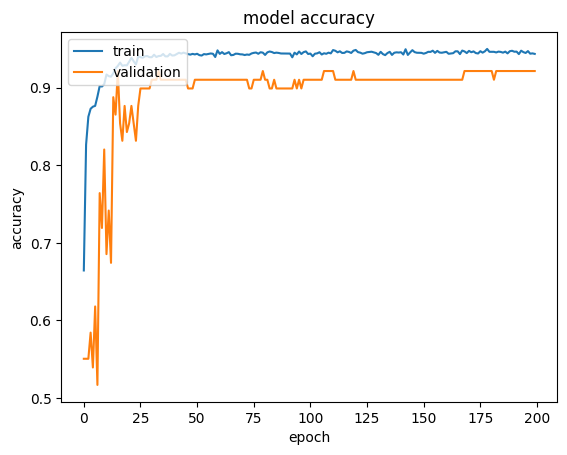

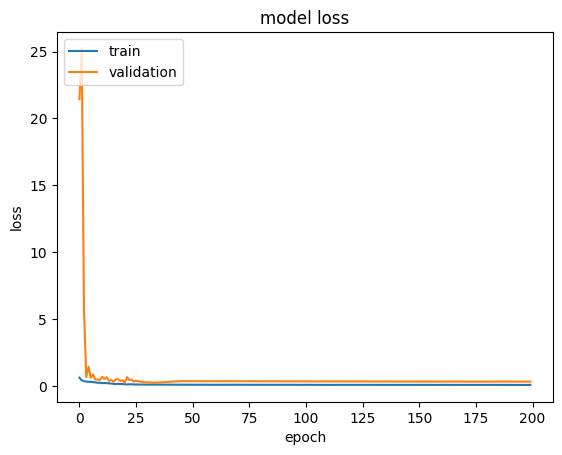

In [57]:
predictions = best_model4.predict(X_luna_fixed_test)
predicted_classes = (predictions > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report4 = classification_report(y_luna_fixed_test, predicted_classes , target_names=class_names)
print("Classification Report:\n", report4)

# Generate the confusion matrix
cm4 = confusion_matrix(y_luna_fixed_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

auc = roc_auc_score(y_luna_fixed_test, predictions)
print(f'AUC: {auc}')
#---------------------------------------------------------
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
pickle.dump(X_train4,open('train4_x','wb'))
pickle.dump(y_train4,open('train4_y','wb'))
pickle.dump(z_train4,open('train4_z','wb'))

### unpredicted data after 4th train

In [59]:
datas_semi = []
labels_semi = []
scans_semi = []

for i in incorrect_predictions3:
        img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

        for img_file in img_files:
            img = nib.load(img_file)
            data = img.get_fdata()
            datas_semi.append(data)
            scans_semi.append(i)

X_semi4 = np.array(datas_semi)
z_semi4 = np.array(scans_semi)

print(X_semi4.shape)

(30, 32, 32, 32)


In [60]:
correct_predictions4 = []
incorrect_predictions4 = []

predictions = best_model4.predict(X_semi4)
for i in range(len(X_semi4)):
    if predictions[i] > 0.9:
        correct_predictions4.append((z_luna_semi[i], 1))
    elif predictions[i] < 0.1:
        correct_predictions4.append((z_luna_semi[i], 0))
    else:
        incorrect_predictions4.append(z_luna_semi[i])

# Create a DataFrame with 'scan' and 'malignancy' columns
df_correct_predictions4 = pd.DataFrame(correct_predictions4, columns=['scan', 'malignancy'])

print(df_correct_predictions4.shape)
print(len(incorrect_predictions4),len(correct_predictions4))

scan_identifiers_z_train5 = np.array([item[0] for item in correct_predictions4])

1/1 [==============================] - 0s 229ms/step
(21, 2)
9 21


In [61]:
datas_train = []
labels_train=[]
scans_train=[]

datas_val = []
labels_val=[]
scans_val=[]



for i in scan_identifiers_z_train5:
    lab = df_correct_predictions4.loc[df_correct_predictions4['scan'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

    scans_train.append(i)
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()

        for j in range(len(angles)):
            rotated_nifti = aug_rotate(data)
            datas_train.append(rotated_nifti.get_fdata())
            labels_train.append(lab)



X_train5=np.array(datas_train)
y_train5=np.array(labels_train)
z_train5=np.array(scans_train)

print(z_train5.shape)

(21,)


In [62]:
X_train = np.concatenate((X_train1, X_train2 , X_train3 , X_train4 , X_train5))
y_train = np.concatenate((y_train1, y_train2 , y_train3 , y_train4 , y_train5))
z_train = np.concatenate((z_train1, z_train2 , z_train3 , z_train4 , z_train5))
print(z_train.shape)

(958,)


## 5th train

In [63]:
with strategy.scope():
    model=define_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('semiSupervised_HU5.h5', monitor='val_accuracy',save_best_only=True)

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
# Fit data to model
history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[lr_callback,checkpoint_callback],verbose=0)


# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model5 = tf.keras.models.load_model('semiSupervised_HU5.h5')

loss5, accuracy5 = best_model5.evaluate(X_luna_fixed_test, y_luna_fixed_test)   

print(f'Luna Accuracy: {accuracy5}')
print('luna loss: ',loss5)


2024-08-10 17:43:55.366395: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 205ms/step - loss: 0.4216 - accuracy: 0.8482
Luna Accuracy: 0.8482142686843872
luna loss:  0.42162132263183594


4/4 [==============================] - 1s 210ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.95      0.74      0.83        57
   malignant       0.78      0.96      0.86        55

    accuracy                           0.85       112
   macro avg       0.87      0.85      0.85       112
weighted avg       0.87      0.85      0.85       112



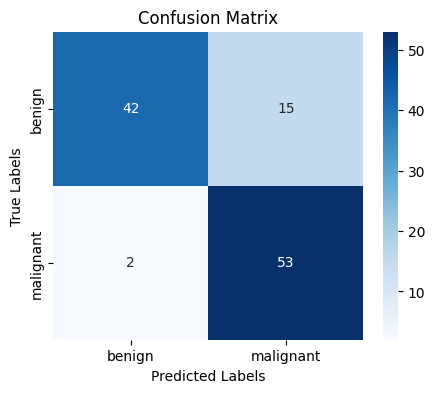

AUC: 0.89792663476874
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


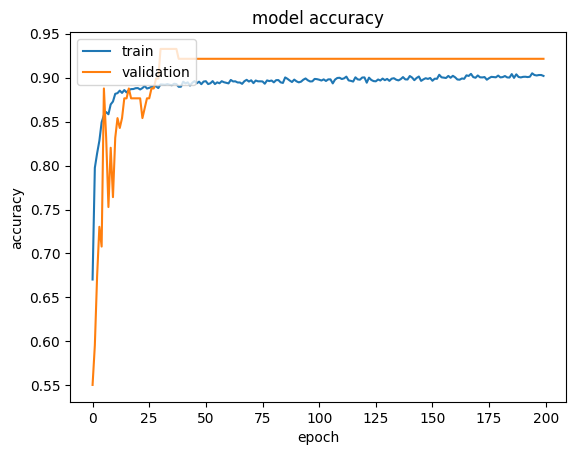

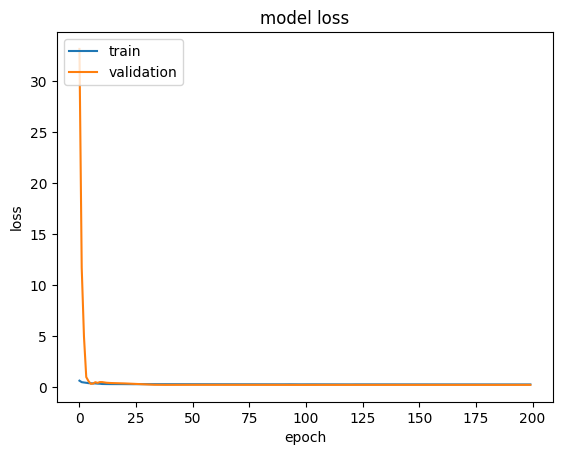

In [64]:
predictions = best_model5.predict(X_luna_fixed_test)
predicted_classes = (predictions > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report5 = classification_report(y_luna_fixed_test, predicted_classes , target_names=class_names)
print("Classification Report:\n", report5)

# Generate the confusion matrix
cm5 = confusion_matrix(y_luna_fixed_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


auc = roc_auc_score(y_luna_fixed_test, predictions)
print(f'AUC: {auc}')
#---------------------------------------------------------
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [65]:
pickle.dump(X_train5,open('train5_x','wb'))
pickle.dump(y_train5,open('train5_y','wb'))
pickle.dump(z_train5,open('train5_z','wb'))

### unpredicted data after fifth train

In [66]:
datas_semi = []
labels_semi = []
scans_semi = []

for i in incorrect_predictions4:
        img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

        for img_file in img_files:
            img = nib.load(img_file)
            data = img.get_fdata()
            datas_semi.append(data)
            scans_semi.append(i)

X_semi5 = np.array(datas_semi)
z_semi5 = np.array(scans_semi)

print(X_semi5.shape)

(9, 32, 32, 32)


In [67]:
predictions = best_model5.predict(X_semi5)
correct_predictions5 = []
incorrect_predictions5 = []

for i in range(len(X_semi5)):
    if predictions[i] > 0.9:
        correct_predictions5.append((z_luna_semi[i], 1))
    elif predictions[i] < 0.1:
        correct_predictions5.append((z_luna_semi[i], 0))
    else:
        incorrect_predictions5.append(z_luna_semi[i])

# Create a DataFrame with 'scan' and 'malignancy' columns
df_correct_predictions5 = pd.DataFrame(correct_predictions5, columns=['scan', 'malignancy'])

print(len(incorrect_predictions5), len(correct_predictions5))

scan_identifiers_z_train6 = np.array([item[0] for item in correct_predictions5])

1/1 [==============================] - 0s 127ms/step
6 3


In [68]:
datas_train = []
labels_train=[]
scans_train=[]

datas_val = []
labels_val=[]
scans_val=[]



for i in scan_identifiers_z_train6:
    lab = df_correct_predictions5.loc[df_correct_predictions5['scan'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

    scans_train.append(i)
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()

        for j in range(len(angles)):
            rotated_nifti = aug_rotate(data)
            datas_train.append(rotated_nifti.get_fdata())
            labels_train.append(lab)



X_train6=np.array(datas_train)
y_train6=np.array(labels_train)
z_train6=np.array(scans_train)

print(z_train6.shape)

(3,)


In [69]:
X_train = np.concatenate((X_train1, X_train2 , X_train3 , X_train4 , X_train5 , X_train6))
y_train = np.concatenate((y_train1, y_train2 , y_train3 , y_train4 , y_train5 , y_train6))
z_train = np.concatenate((z_train1, z_train2 , z_train3 , z_train4 , z_train5 , z_train6))
print(z_train.shape)

(961,)


## 6th train

In [70]:
with strategy.scope():
    model=define_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('semiSupervised_HU6.h5', monitor='val_accuracy',save_best_only=True)

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
# Fit data to model
history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[lr_callback,checkpoint_callback],verbose=0)


# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model6 = tf.keras.models.load_model('semiSupervised_HU6.h5')

loss6, accuracy6 = best_model6.evaluate(X_luna_fixed_test, y_luna_fixed_test)   
print(f'Luna Accuracy: {accuracy6}')
print('luna loss: ',loss6)


2024-08-10 18:04:09.230979: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-10 18:05:27.693273: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 214ms/step - loss: 0.4339 - accuracy: 0.9018
Luna Accuracy: 0.9017857313156128
luna loss:  0.43385449051856995


4/4 [==============================] - 1s 214ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.94      0.86      0.90        57
   malignant       0.87      0.95      0.90        55

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.91      0.90      0.90       112

AUC: 0.8909090909090909


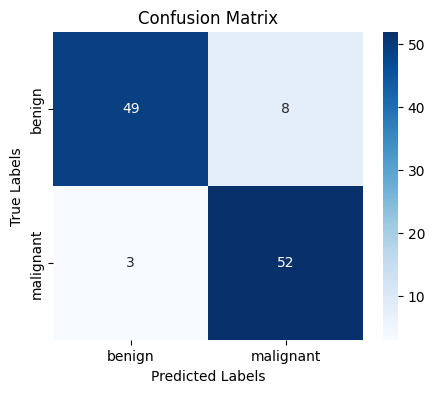

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


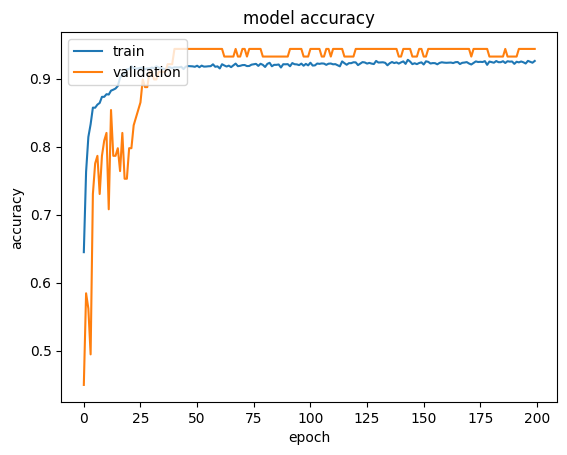

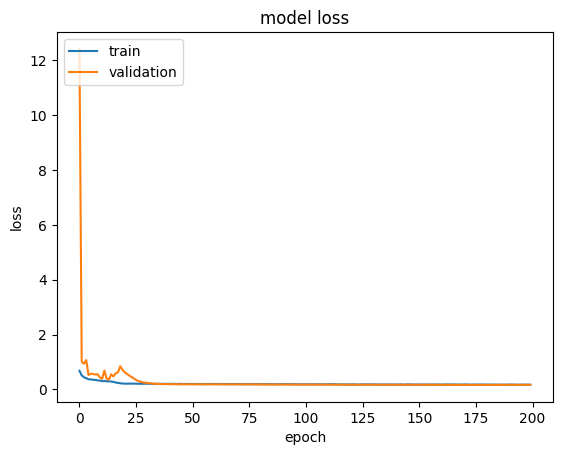

In [71]:
predictions = best_model6.predict(X_luna_fixed_test)
predicted_classes = (predictions > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report6 = classification_report(y_luna_fixed_test, predicted_classes , target_names=class_names)
print("Classification Report:\n", report6)

auc = roc_auc_score(y_luna_fixed_test, predictions)
print(f'AUC: {auc}')

# Generate the confusion matrix
cm6 = confusion_matrix(y_luna_fixed_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm6, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



#---------------------------------------------------------
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [72]:
pickle.dump(X_train6,open('train5_x','wb'))
pickle.dump(y_train6,open('train5_y','wb'))
pickle.dump(z_train6,open('train5_z','wb'))

### unpredicted data after sixth train

In [73]:
datas_semi = []
labels_semi = []
scans_semi = []

for i in incorrect_predictions5:
        img_files = glob.glob(os.path.join("/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled/", i + "*.nii"))

        for img_file in img_files:
            img = nib.load(img_file)
            data = img.get_fdata()
            datas_semi.append(data)
            scans_semi.append(i)

X_semi6 = np.array(datas_semi)
z_semi6 = np.array(scans_semi)

print(X_semi6.shape)

(6, 32, 32, 32)


In [74]:
predictions = best_model6.predict(X_semi6)
correct_predictions6 = []
incorrect_predictions6 = []

for i in range(len(X_semi6)):
    if predictions[i] > 0.9:
        correct_predictions6.append((z_luna_semi[i], 1))
    elif predictions[i] < 0.1:
        correct_predictions6.append((z_luna_semi[i], 0))
    else:
        incorrect_predictions6.append(z_luna_semi[i])

# Create a DataFrame with 'scan' and 'malignancy' columns
df_correct_predictions6 = pd.DataFrame(correct_predictions6, columns=['scan', 'malignancy'])

print(len(incorrect_predictions6), len(correct_predictions6))

scan_identifiers_z_train7 = np.array([item[0] for item in correct_predictions6])

1/1 [==============================] - 0s 71ms/step
0 6


In [76]:
import pandas as pd

# Assuming z_train1, z_train2, etc., are numpy arrays
z_train_lists = [z_train1, z_train2, z_train3, z_train4, z_train5, z_train6]
z_val_lists = [z_val1]

# Create DataFrames from numpy arrays with unique column names
df_train_list = [pd.DataFrame({f'z_train{i + 1}': z_train}) for i, z_train in enumerate(z_train_lists)]
df_val_list = [pd.DataFrame({'z_val': z_val}) for z_val in z_val_lists]

# Concatenate the DataFrames along the columns
df_combined = pd.concat(df_val_list + df_train_list, axis=1)

# Save the combined DataFrame to an Excel file
df_combined.to_excel('combined_train_val_lists.xlsx', index=False)


In [77]:
all_dfs = [df_correct_predictions1, df_correct_predictions2,df_correct_predictions3,df_correct_predictions4,df_correct_predictions5]
result_df = pd.concat(all_dfs, ignore_index=True)

# Save the concatenated DataFrame to an Excel file
result_df.to_excel('output_file.xlsx', index=False)

In [78]:
accuracy_list = [round(accuracy * 100, 2) for accuracy in [accuracy1, accuracy2,accuracy3, accuracy4, accuracy5, accuracy6]]
loss_list = [round(loss * 100, 2) for loss in [loss1, loss2,loss3, loss4, loss5, loss6]]

df_accloss = pd.DataFrame({ 'accuracy': accuracy_list, 'loss': loss_list})
print(df_accloss)

   accuracy   loss
0     87.50  35.71
1     83.93  52.96
2     85.71  35.06
3     85.71  59.65
4     84.82  42.16
5     90.18  43.39


In [79]:
X_train = np.concatenate((X_train1, X_train2 , X_train3 , X_train4 , X_train5,X_train6))
y_train = np.concatenate((y_train1, y_train2 , y_train3 , y_train4 , y_train5,y_train6))
z_train = np.concatenate((z_train1, z_train2 , z_train3 , z_train4 , z_train5,z_train6))
print(z_train.shape)

X_test= X_luna_fixed_test
y_test= y_luna_fixed_test
z_test= z_luna_fixed_test

pickle.dump(X_train,open('train_x','wb'))
pickle.dump(y_train,open('train_y','wb'))
pickle.dump(z_train,open('train_z','wb'))

(961,)


# HU

# Dividing into 2 branches random initializer

In [80]:
# Custom layer with trainable variables
from tensorflow.keras.constraints import Constraint

class RangeConstraint(Constraint):
    def __init__(self, min_value=0.0, max_value=1.0):
        self.min_value = min_value
        self.max_value = max_value

    def __call__(self, w):
        return tf.clip_by_value(w, self.min_value, self.max_value)

    def get_config(self):
        return {'min_value': self.min_value, 'max_value': self.max_value}


# Custom layer with trainable variables
class LearnableDynamicRange(Layer):
    def __init__(self, **kwargs):
        # Use the provided name or the default name if not provided
        name = kwargs.pop('name', 'learnable_dynamic_range')
        super(LearnableDynamicRange, self).__init__(name=name, **kwargs)

        # Define trainable variables with initial values
        self.a = self.add_weight(
            name='a',
            shape=(1,),
            initializer=tf.random_uniform_initializer(minval=0.0, maxval=1.0),
            constraint=RangeConstraint(min_value=0.3, max_value=0.7),
            trainable=True
        )
      
        
    def call(self, inputs):
        
        a_layer = tf.where(inputs > self.a, 1.0, inputs / self.a)
        b_layer = tf.clip_by_value((inputs - self.a) / (1 - self.a), 0, 1)


        return a_layer, b_layer


# Model
def conv_block(inputs):
    x = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    x = Dropout(0.3)(x)
    
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    
    return x

def define_model():
    input_shape = (32, 32, 32, 1)
    input_data = Input(shape=input_shape)

    # Use the custom layer with trainable variables
    dynamic_range_layer = LearnableDynamicRange()(input_data)
    a_layer, b_layer= dynamic_range_layer

    branch_a = conv_block(a_layer)
    branch_b = conv_block(b_layer)
    
    concatenated_branches = concatenate([branch_a, branch_b])

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(concatenated_branches)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=input_data, outputs=output_layer)

    return model

In [81]:
with strategy.scope():
    model=define_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)
checkpoint_callback = ModelCheckpoint('Luna_train1.h5', monitor='val_accuracy',save_best_only=True, save_format='tf')


BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync


history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[checkpoint_callback,lr_callback],verbose=0)


best_model1 = tf.keras.models.load_model('Luna_train1.h5', custom_objects={'LearnableDynamicRange': LearnableDynamicRange})

loss1, accuracy1 = best_model1.evaluate(X_test, y_test)
print('accuracy: ',accuracy1*100)
print('loss: ',loss1*100)

print('-----------------------------------------------------------------')
a_value = best_model1.get_layer('learnable_dynamic_range').a.numpy()
print("Value of 'a' in the best model:", a_value)

2024-08-10 18:24:57.983510: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-10 18:26:35.810331: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 2s 379ms/step - loss: 0.3303 - accuracy: 0.8929
accuracy:  89.28571343421936
loss:  33.03411900997162
-----------------------------------------------------------------
Value of 'a' in the best model: [0.63969356]


4/4 [==============================] - 2s 365ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.90909   0.87719   0.89286        57
   malignant    0.87719   0.90909   0.89286        55

    accuracy                        0.89286       112
   macro avg    0.89314   0.89314   0.89286       112
weighted avg    0.89343   0.89286   0.89286       112

AUC: 0.9346092503987241


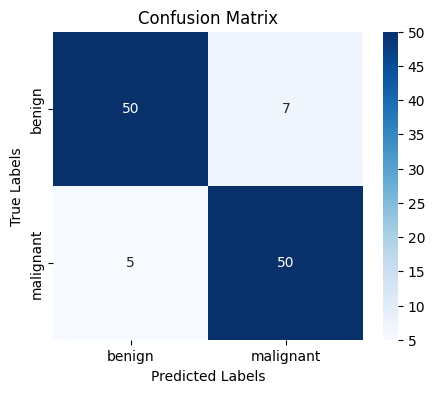

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


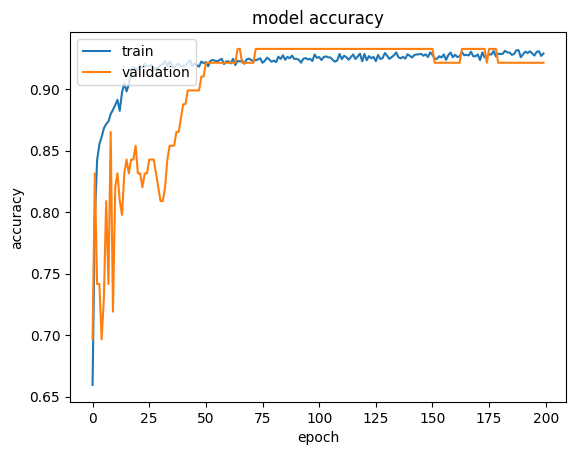

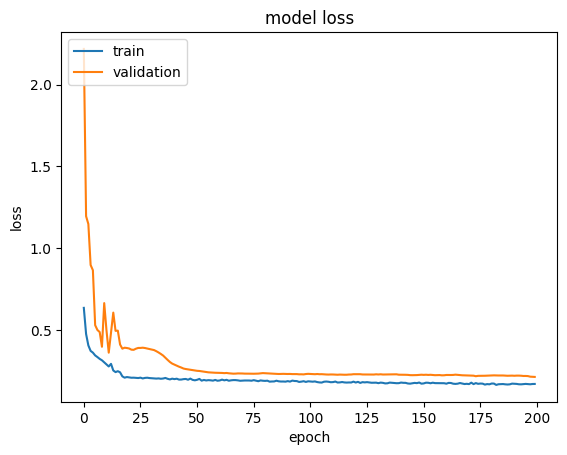

/tmp/ipykernel_13/4181205450.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  auc_df = pd.concat([auc_df, combined_row_df], ignore_index=True)


In [82]:
auc_df = pd.DataFrame(columns=['AUC'])   


luna_correct_hu1=[]
predictions1 = best_model1.predict(X_test)
predicted_classes = (predictions1 > 0.5).astype(int)


#---------------------------------------------------------------------------------
# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes, target_names=class_names,digits=5)
print("Classification Report:\n", report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions1)
print(f'AUC: {auc}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Extract micro avg 
report0 = classification_report(y_test, predicted_classes, target_names=class_names,digits=5,output_dict=True)
precision = report0['macro avg']['precision']
recall = report0['macro avg']['recall']
f1_score = report0['macro avg']['f1-score']
combined_row = {'AUC': auc*100, 'Precision': precision*100, 'Recall': recall*100, 'F1-Score': f1_score*100}
combined_row_df = pd.DataFrame([combined_row])
auc_df = pd.concat([auc_df, combined_row_df], ignore_index=True)

# Dividing into 2 branches constant initializer


In [83]:
# Custom layer with trainable variables
class LearnableDynamicRange(Layer):
    def __init__(self, initial_a, **kwargs):
        # Use the provided name or the default name if not provided
        name = kwargs.pop('name', 'learnable_dynamic_range')
        super(LearnableDynamicRange, self).__init__(name=name, **kwargs)

        # Define trainable variables with initial values
        self.a = self.add_weight(
            name='a',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_a),
            trainable=True
        )
       
        
    def call(self, inputs):
        
        a_layer = tf.where(inputs > self.a, 1.0, inputs / self.a)
        b_layer = tf.clip_by_value((inputs - self.a) / (1 - self.a), 0, 1)


        return a_layer, b_layer


def define_model(initial_a):
    input_shape = (32, 32, 32, 1)
    input_data = Input(shape=input_shape)

    # Use the custom layer with trainable variables
    dynamic_range_layer = LearnableDynamicRange(initial_a=initial_a)(input_data)
    a_layer, b_layer = dynamic_range_layer

    branch_a = conv_block(a_layer)
    branch_b = conv_block(b_layer)
    

    concatenated_branches = concatenate([branch_a, branch_b])

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(concatenated_branches)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=input_data, outputs=output_layer)

    return model

In [84]:
with strategy.scope():
    model=define_model(0.5)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)

checkpoint_callback = ModelCheckpoint('Luna_train2.h5', monitor='val_accuracy',save_best_only=True, save_format='tf')

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync


history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[checkpoint_callback,lr_callback],verbose=0)
    

best_model2 = tf.keras.models.load_model('Luna_train2.h5', custom_objects={'LearnableDynamicRange': LearnableDynamicRange})

loss2, accuracy2 = best_model2.evaluate(X_test, y_test)
print('accuracy: ',accuracy2*100)
print('loss: ',loss2*100)

print('-----------------------------------------------------------------')
a_value = best_model2.get_layer('learnable_dynamic_range').a.numpy()
print("Value of 'a' in the best model:", a_value)

2024-08-10 18:54:38.309501: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-10 18:56:15.588338: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 2s 354ms/step - loss: 0.3145 - accuracy: 0.9018
accuracy:  90.17857313156128
loss:  31.447559595108032
-----------------------------------------------------------------
Value of 'a' in the best model: [0.48493397]


4/4 [==============================] - 2s 371ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.96000   0.84211   0.89720        57
   malignant    0.85484   0.96364   0.90598        55

    accuracy                        0.90179       112
   macro avg    0.90742   0.90287   0.90159       112
weighted avg    0.90836   0.90179   0.90151       112

AUC: 0.9358851674641149


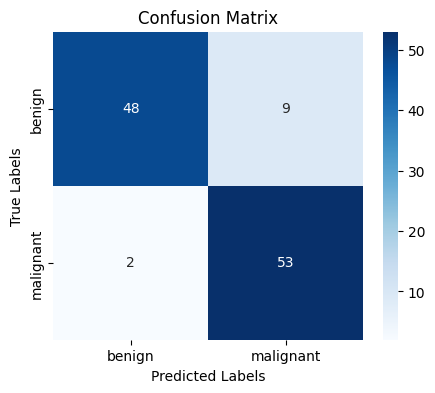

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


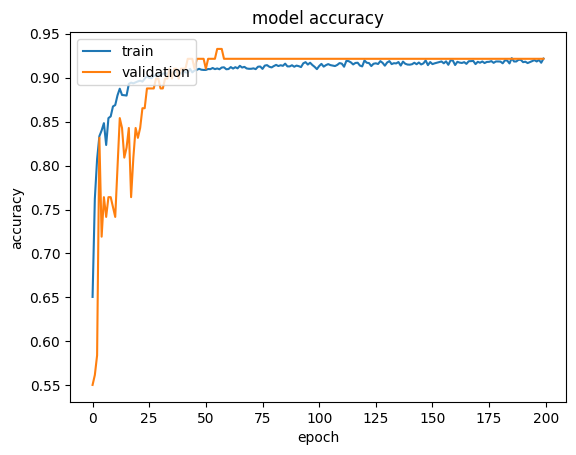

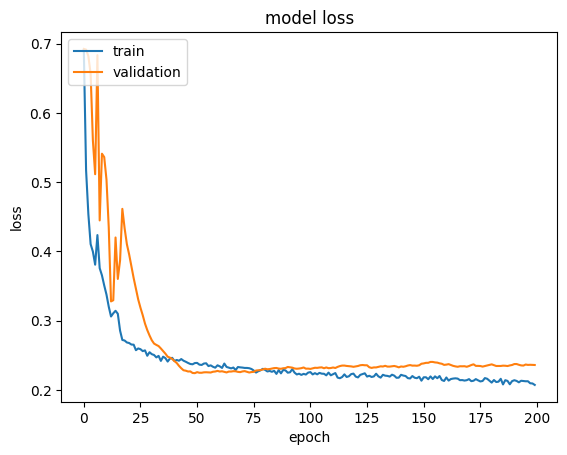

In [85]:
luna_correct_hu2=[]
predictions2 = best_model2.predict(X_test)
predicted_classes = (predictions2 > 0.5).astype(int)


#---------------------------------------------------------------------------------
# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes, target_names=class_names,digits=5)
print("Classification Report:\n", report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions2)
print(f'AUC: {auc}')



# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Extract micro avg 
report0 = classification_report(y_test, predicted_classes, target_names=class_names,digits=5,output_dict=True)
precision = report0['macro avg']['precision']
recall = report0['macro avg']['recall']
f1_score = report0['macro avg']['f1-score']
combined_row = {'AUC': auc*100, 'Precision': precision*100, 'Recall': recall*100, 'F1-Score': f1_score*100}
combined_row_df = pd.DataFrame([combined_row])
auc_df = pd.concat([auc_df, combined_row_df], ignore_index=True)

# Dividing into 3 branches constant initializer

In [86]:
# Custom layer with trainable variables
class LearnableDynamicRange(Layer):
    def __init__(self, initial_a, initial_b, **kwargs):
        # Use the provided name or the default name if not provided
        name = kwargs.pop('name', 'learnable_dynamic_range')
        super(LearnableDynamicRange, self).__init__(name=name, **kwargs)

        # Define trainable variables with initial values
        self.a = self.add_weight(
            name='a',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_a),
            trainable=True
        )
        self.b = self.add_weight(
            name='b',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_b),
            trainable=True
        )
        
    def call(self, inputs):
        
        a_layer = tf.where(inputs > self.a, 1.0, inputs / self.a)
        b_layer = tf.clip_by_value(tf.where(inputs > self.b, 1.0, (inputs - self.a) / (self.b - self.a)), 0, 1)
        c_layer = tf.clip_by_value((inputs - self.b) / (1 - self.b), 0, 1)


        return a_layer, b_layer, c_layer




def define_model(initial_a, initial_b):
    input_shape = (32, 32, 32, 1)
    input_data = Input(shape=input_shape)

    # Use the custom layer with trainable variables
    dynamic_range_layer = LearnableDynamicRange(initial_a=initial_a, initial_b=initial_b)(input_data)
    a_layer, b_layer, c_layer = dynamic_range_layer

    branch_a = conv_block(a_layer)
    branch_b = conv_block(b_layer)
    branch_c = conv_block(c_layer)

    

    concatenated_branches = concatenate([branch_a, branch_b, branch_c])

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(concatenated_branches)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=input_data, outputs=output_layer)

    return model

In [87]:
with strategy.scope():
    model=define_model(0.33,0.66)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)
checkpoint_callback = ModelCheckpoint('Luna_train4.h5', monitor='val_accuracy',save_best_only=True, save_format='tf')

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync


history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[checkpoint_callback,lr_callback],verbose=0)
    

best_model4 = tf.keras.models.load_model('Luna_train4.h5', custom_objects={'LearnableDynamicRange': LearnableDynamicRange})

loss4, accuracy4 = best_model4.evaluate(X_test, y_test)
print('accuracy: ',accuracy4*100)
print('loss: ',loss4*100)

print('--------------------------------------------------------------------')
a_value = best_model4.get_layer('learnable_dynamic_range').a.numpy()
b_value = best_model4.get_layer('learnable_dynamic_range').b.numpy()
print("Value of 'a' in the best model:", a_value)
print("Value of 'b' in the best model:", b_value)

2024-08-10 19:23:48.027896: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-10 19:25:39.061822: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 3s 503ms/step - loss: 0.3179 - accuracy: 0.9196
accuracy:  91.96428656578064
loss:  31.79245889186859
--------------------------------------------------------------------
Value of 'a' in the best model: [0.31880978]
Value of 'b' in the best model: [0.6748502]


4/4 [==============================] - 3s 498ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.96154   0.87719   0.91743        57
   malignant    0.88333   0.96364   0.92174        55

    accuracy                        0.91964       112
   macro avg    0.92244   0.92041   0.91959       112
weighted avg    0.92313   0.91964   0.91955       112

AUC: 0.9186602870813396


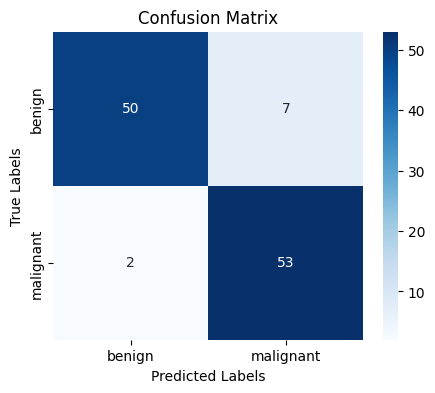

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


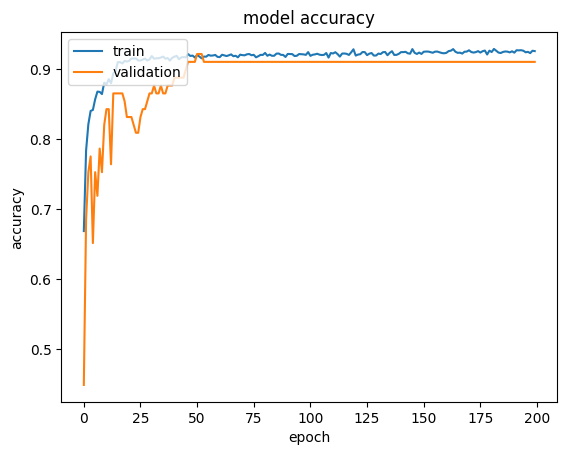

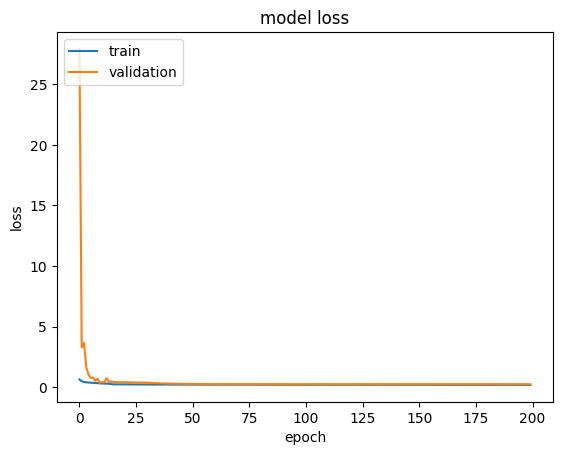

In [88]:
luna_correct_hu4=[]
predictions4 = best_model4.predict(X_test)
predicted_classes = (predictions4 > 0.5).astype(int)

#---------------------------------------------------------------------------------
# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes, target_names=class_names,digits=5)
print("Classification Report:\n", report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions4)
print(f'AUC: {auc}')



# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Extract micro avg 
report0 = classification_report(y_test, predicted_classes, target_names=class_names,digits=5,output_dict=True)
precision = report0['macro avg']['precision']
recall = report0['macro avg']['recall']
f1_score = report0['macro avg']['f1-score']
combined_row = {'AUC': auc*100, 'Precision': precision*100, 'Recall': recall*100, 'F1-Score': f1_score*100}
combined_row_df = pd.DataFrame([combined_row])
auc_df = pd.concat([auc_df, combined_row_df], ignore_index=True)

# HU (with original input)
## Dividing into 2 branches constant initializer

In [89]:
# Custom layer with trainable variables
class LearnableDynamicRange(Layer):
    def __init__(self, initial_a, **kwargs):
        # Use the provided name or the default name if not provided
        name = kwargs.pop('name', 'learnable_dynamic_range')
        super(LearnableDynamicRange, self).__init__(name=name, **kwargs)

        # Define trainable variables with initial values
        self.a = self.add_weight(
            name='a',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_a),
            trainable=True
        )
        
        
    def call(self, inputs):
        
        a_layer = tf.where(inputs > self.a, 1.0, inputs / self.a)
        b_layer = tf.clip_by_value((inputs - self.a) / (1 - self.a), 0, 1)
        c_layer = inputs

        return a_layer, b_layer, c_layer



def define_model(initial_a):
    input_shape = (32, 32, 32, 1)
    input_data = Input(shape=input_shape)

    # Use the custom layer with trainable variables
    dynamic_range_layer = LearnableDynamicRange(initial_a=initial_a)(input_data)
    a_layer, b_layer, c_layer = dynamic_range_layer

    branch_a = conv_block(a_layer)
    branch_b = conv_block(b_layer)
    branch_c = conv_block(c_layer)
    

    concatenated_branches = concatenate([branch_a, branch_b, branch_c])

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(concatenated_branches)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=input_data, outputs=output_layer)

    return model

In [90]:
with strategy.scope():
    model=define_model(0.5)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)
checkpoint_callback = ModelCheckpoint('Luna_train14.h5', monitor='val_accuracy',save_best_only=True, save_format='tf')

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync


history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[checkpoint_callback,lr_callback],verbose=0)
    

best_model14 = tf.keras.models.load_model('Luna_train14.h5', custom_objects={'LearnableDynamicRange': LearnableDynamicRange})

loss14, accuracy14 = best_model14.evaluate(X_test, y_test)
print('accuracy: ',accuracy14*100)
print('loss: ',loss14*100)

print('------------------------------------------------')
a_value = best_model14.get_layer('learnable_dynamic_range').a.numpy()
print("Value of 'a' in the best model:", a_value)

2024-08-10 19:51:46.626353: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-10 19:53:40.374639: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 3s 517ms/step - loss: 0.3965 - accuracy: 0.8750
accuracy:  87.5
loss:  39.65340554714203
------------------------------------------------
Value of 'a' in the best model: [0.4901284]


4/4 [==============================] - 3s 501ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.90566   0.84211   0.87273        57
   malignant    0.84746   0.90909   0.87719        55

    accuracy                        0.87500       112
   macro avg    0.87656   0.87560   0.87496       112
weighted avg    0.87708   0.87500   0.87492       112

AUC: 0.907177033492823


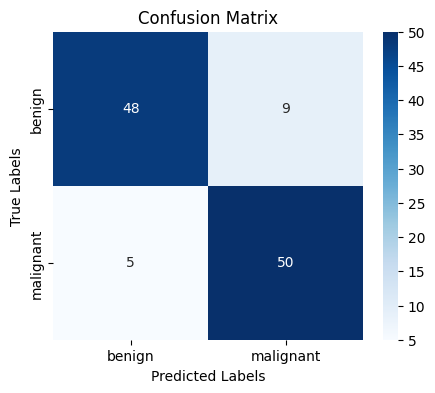

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


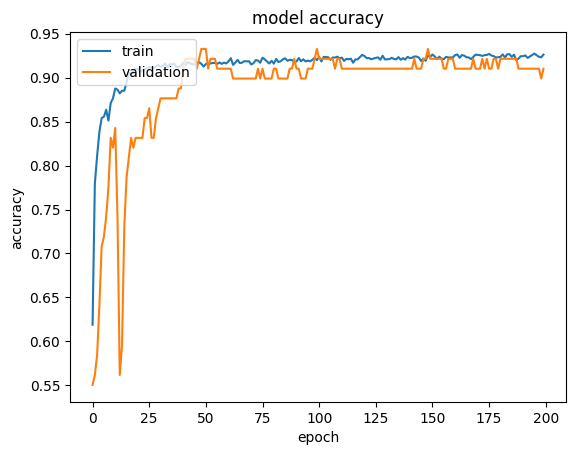

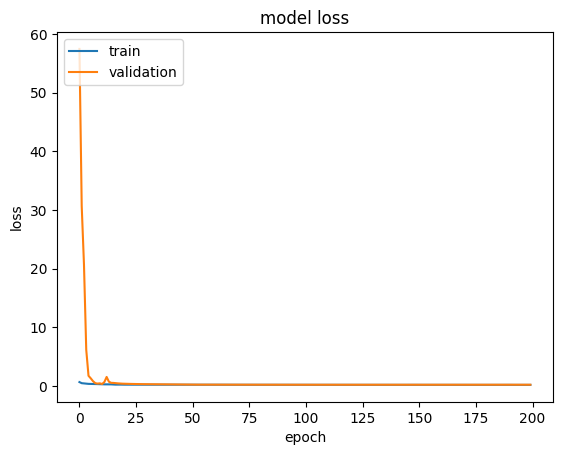

In [91]:
luna_correct_hu14=[]
predictions14 = best_model14.predict(X_test)
predicted_classes = (predictions14 > 0.5).astype(int)


#---------------------------------------------------------------------------------
# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes, target_names=class_names,digits=5)
print("Classification Report:\n", report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions14)
print(f'AUC: {auc}')



# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Extract micro avg 
report0 = classification_report(y_test, predicted_classes, target_names=class_names,digits=5,output_dict=True)
precision = report0['macro avg']['precision']
recall = report0['macro avg']['recall']
f1_score = report0['macro avg']['f1-score']
combined_row = {'AUC': auc*100, 'Precision': precision*100, 'Recall': recall*100, 'F1-Score': f1_score*100}
combined_row_df = pd.DataFrame([combined_row])
auc_df = pd.concat([auc_df, combined_row_df], ignore_index=True)

# Dividing into 3 branches constant initializer

In [92]:
# Custom layer with trainable variables
class LearnableDynamicRange(Layer):
    def __init__(self, initial_a, initial_b, **kwargs):
        # Use the provided name or the default name if not provided
        name = kwargs.pop('name', 'learnable_dynamic_range')
        super(LearnableDynamicRange, self).__init__(name=name, **kwargs)

        # Define trainable variables with initial values
        self.a = self.add_weight(
            name='a',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_a),
            trainable=True
        )
        self.b = self.add_weight(
            name='b',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_b),
            trainable=True
        )
        
    def call(self, inputs):
        
        a_layer = tf.where(inputs > self.a, 1.0, inputs / self.a)
        b_layer = tf.clip_by_value(tf.where(inputs > self.b, 1.0, (inputs - self.a) / (self.b - self.a)), 0, 1)
        c_layer = tf.clip_by_value((inputs - self.b) / (1 - self.b), 0, 1)
        d_layer = inputs

        return a_layer, b_layer, c_layer, d_layer



def define_model(initial_a, initial_b):
    input_shape = (32, 32, 32, 1)
    input_data = Input(shape=input_shape)

    # Use the custom layer with trainable variables
    dynamic_range_layer = LearnableDynamicRange(initial_a=initial_a, initial_b=initial_b)(input_data)
    a_layer, b_layer, c_layer, d_layer = dynamic_range_layer

    branch_a = conv_block(a_layer)
    branch_b = conv_block(b_layer)
    branch_c = conv_block(c_layer)
    branch_d = conv_block(d_layer)
    

    concatenated_branches = concatenate([branch_a, branch_b, branch_c,branch_d])

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(concatenated_branches)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=input_data, outputs=output_layer)

    return model

In [93]:
with strategy.scope():
    model=define_model(0.33,0.66)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)
checkpoint_callback = ModelCheckpoint('Luna_train16.h5', monitor='val_accuracy',save_best_only=True, save_format='tf')

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync


history = model.fit(X_train, y_train, validation_data=(X_val1, y_val1), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[checkpoint_callback,lr_callback],verbose=0)
    

best_model16 = tf.keras.models.load_model('Luna_train16.h5', custom_objects={'LearnableDynamicRange': LearnableDynamicRange})

loss16, accuracy16 = best_model16.evaluate(X_test, y_test)
print('accuracy: ',accuracy16*100)
print('loss: ',loss16*100)


print('-----------------------------------------------------------------')
a_value = best_model16.get_layer('learnable_dynamic_range').a.numpy()
b_value = best_model16.get_layer('learnable_dynamic_range').b.numpy()
 
print("Value of 'a' in the best model:", a_value)
print("Value of 'b' in the best model:", b_value)

2024-08-10 20:17:27.094737: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-10 20:19:36.296387: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 4s 636ms/step - loss: 0.4610 - accuracy: 0.8304
accuracy:  83.03571343421936
loss:  46.104636788368225
-----------------------------------------------------------------
Value of 'a' in the best model: [0.30287617]
Value of 'b' in the best model: [0.6519051]


4/4 [==============================] - 4s 670ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.88000   0.77193   0.82243        57
   malignant    0.79032   0.89091   0.83761        55

    accuracy                        0.83036       112
   macro avg    0.83516   0.83142   0.83002       112
weighted avg    0.83596   0.83036   0.82988       112

AUC: 0.8692185007974481


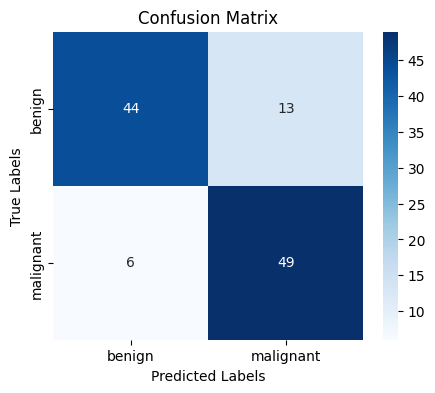

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


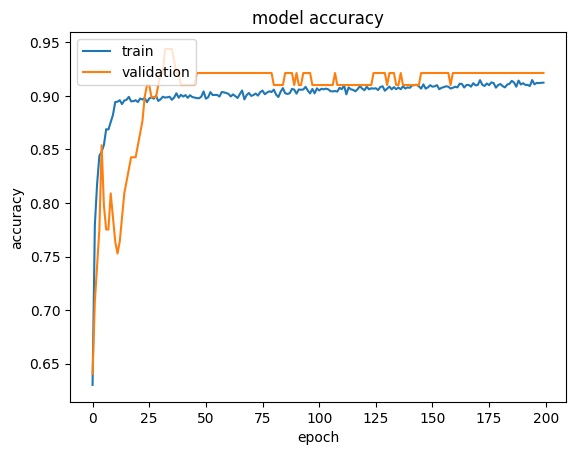

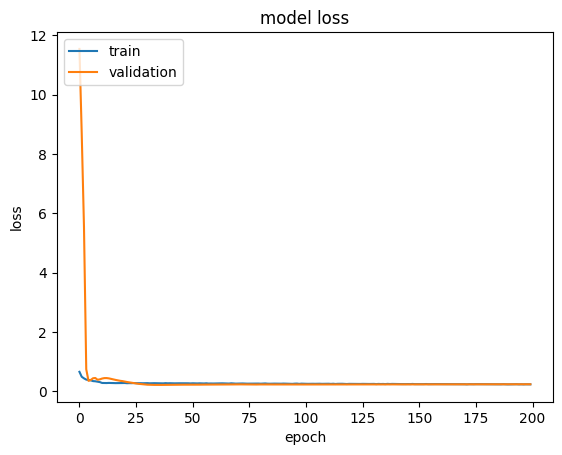

In [94]:
luna_correct_hu16=[]
predictions16 = best_model16.predict(X_test)
predicted_classes = (predictions16 > 0.5).astype(int)


#---------------------------------------------------------------------------------
# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes, target_names=class_names,digits=5)
print("Classification Report:\n", report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions16)
print(f'AUC: {auc}')



# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Extract micro avg 
report0 = classification_report(y_test, predicted_classes, target_names=class_names,digits=5,output_dict=True)
precision = report0['macro avg']['precision']
recall = report0['macro avg']['recall']
f1_score = report0['macro avg']['f1-score']
combined_row = {'AUC': auc*100, 'Precision': precision*100, 'Recall': recall*100, 'F1-Score': f1_score*100}
combined_row_df = pd.DataFrame([combined_row])
auc_df = pd.concat([auc_df, combined_row_df], ignore_index=True)

In [95]:
accuracy_list = [round(accuracy * 100, 2) for accuracy in [accuracy1, accuracy2, accuracy4, accuracy14, accuracy16]]

col_head = [
    '2 ranges (without original input, random)', 
    '2 ranges (without original input, constant)', 
    '3 ranges (without original input, constant)',
    '2 ranges (+ original input, constant)',
    '3 ranges (+ original input, constant)'
]

df_acc = pd.DataFrame({'type': col_head, 'accuracy': accuracy_list})
print(df_acc)
print(auc_df)
# Save Excel file
df_acc.to_excel('df_acc.xlsx', index=False)
auc_df.to_excel('df_auc.xlsx', index=False)

                                          type  accuracy
0    2 ranges (without original input, random)     89.29
1  2 ranges (without original input, constant)     90.18
2  3 ranges (without original input, constant)     91.96
3        2 ranges (+ original input, constant)     87.50
4        3 ranges (+ original input, constant)     83.04
         AUC  Precision     Recall   F1-Score
0  93.460925  89.314195  89.314195  89.285714
1  93.588517  90.741935  90.287081  90.158958
2  91.866029  92.243590  92.041467  91.958516
3  90.717703  87.655900  87.559809  87.496013
4  86.921850  83.516129  83.141946  83.001837
